In [1]:
import pandas as pd 


In [2]:
df= pd.read_csv ("myopia.csv")

In [3]:
df.head(
)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [4]:
del df["MYOPIC"]

In [5]:
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
st= StandardScaler()
scaledata = st.fit_transform(df) 
print(scaledata)


[[-4.20219106e-01 -1.36391690e+00 -8.92861464e-01 ...  4.98303926e-01
   9.87137728e-01  1.00324150e+00]
 [-4.20219106e-01 -3.08612235e-01 -1.71839800e-01 ... -8.75087555e-01
   9.87137728e-01  1.00324150e+00]
 [-4.20219106e-01  6.04386289e-01 -9.97682023e-03 ... -7.50233784e-01
  -1.01302987e+00 -9.96768974e-01]
 ...
 [-4.20219106e-01  1.65169621e+00  6.52187361e-01 ... -1.37450264e+00
   9.87137728e-01  1.00324150e+00]
 [-4.20219106e-01 -2.17472219e-01 -8.48716244e-01 ... -1.88391815e-01
  -1.01302987e+00 -9.96768974e-01]
 [-4.20219106e-01  1.58339808e-03 -3.48415042e-01 ... -7.50233784e-01
   9.87137728e-01  1.00324150e+00]]


In [8]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components = .9)
  
pc = pca.fit_transform(scaledata)

  
explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [9]:
from sklearn.manifold import TSNE


In [10]:
#creae the model
tsne = TSNE()
#apply it to the data
tsnedims = tsne.fit_transform(pc)
#check the shape
tsnedims.shape


/Users/Nas/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/Nas/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(618, 2)

In [11]:
tsnedims


array([[-14.759412 ,  11.962036 ],
       [-14.255809 ,  -6.5262837],
       [ 15.310961 ,   4.3129215],
       ...,
       [-15.23685  ,  -8.473783 ],
       [ 23.371256 ,  -1.2038242],
       [ -3.1541095,  -8.6235   ]], dtype=float32)

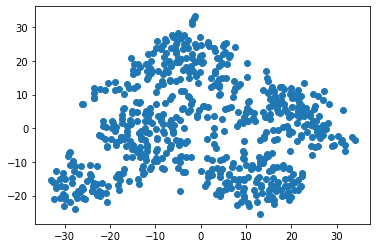

In [15]:
import matplotlib.pyplot as plt
plt.scatter(tsnedims[:,0],tsnedims[:,1])


## after performing tsne on the pca data it looks like there were five distinct clusters 

In [16]:
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pc)
    sse.append(kmeans.inertia_)

In [18]:
k= range(1,11)
elbowpointdf = pd.DataFrame ({
    "k":k,
    "inertia":sse
    
})

elbowpointdf

,k,inertia
0,1,7948.905345
1,2,6794.293482
2,3,6030.941519
3,4,5664.402273
4,5,5377.623766
5,6,5131.088940
6,7,4923.124000
7,8,4781.730672
8,9,4614.016449
9,10,4468.488006


<AxesSubplot:xlabel='k'>

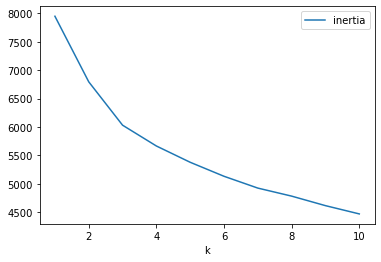

In [19]:
elbowpointdf.plot(x="k",y="inertia")

## based on the elbow curve k appears 2-4. 

## based on the various techniques (tsne,kmeans) that we applied, the patients can be clustered. there were between 2-5 clusters.